In [1]:
import sys

In [2]:
print(sys.path)

['/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python310.zip', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/lib-dynload', '', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/site-packages']


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import pandas as pd
from munc13 import Munc13, Solver

In [4]:
import sys
print(sys.path)

['/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python310.zip', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/lib-dynload', '', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/site-packages']


In [5]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [6]:
# this is used to create the model for analysis and plotting without running the GA
parameter_ranges = {
        "kfsr":      {"min": 0.001, "max": 10},   # kfSR uM-1s-1
        #"krsr_nostim":      {"min": 0.1,   "max": 1000}, # krSR_nostim
        "krsr":       {"min": 0.001,   "max": 1000}, # krSR_stim s-1
        "kfmm":      {"min": 0.01, "max": 10},   # kfMM uM-1s-1
        "krmm":      {"min": 0.01,   "max": 100}, # krMM s-1
        "kfmx":      {"min": 0.001, "max": 10},   # kf1x uM-1s-1
        "krmx":      {"min": 0.01,   "max": 1000}, # kr1x s-1
       # "kfc_nostim":      {"min": 0.001, "max": 10},   # kfc_nostim
        "kfc":      {"min": 0.001, "max": 10},   # kfc_stim uM-1s-1
        "krc":      {"min": 0.01, "max": 1000},   # krc
        "kfxx":      {"min": 0.001, "max": 10},   # kx2 uM-1s-1
        "krxx":      {"min": 0.01,   "max": 1000}, # krx2 s-1
        "eMLoop":      {"min": 0.001,   "max": 10}, # exp(free energy kT units <0).
        "eDF":      {"min": 0.001,   "max": 10}, # exp(free energy kT units <0).
        "kfdd":     {"min": 0.01,   "max": 1}, # kfdd unimolecular: s-1
        "stimUpSR":       {"min": 1,   "max": 100}, # stimUpSR: scale factor >1
        "S0":        {"min": 0.001, "max": 5},   # S0 (uM)
        "R0":        {"min": 0.1, "max": 10000},   # R0 (/um^2)
        #"D1":        {"min": 0.05,   "max": 5}, # D1
        #"D1_over_D2":        {"min": 1.5,   "max": 5}, # D2
        "X0":        {"min": 0.05,   "max": 100}, # X0  (/um^2)
        "C0":       {"min": 0.05,   "max":  10}, # X0  (/um^2)
        "kfcm":     {"min": 1e-26,   "max": 1e-26}, # kfcm: should be slow  (uM-1s-1)
        "krcm":     {"min": 0.1,   "max": 1000}, # krcm  (s-1)
        "eCA":      {"min": 0.001,   "max": 10}, # eCA  (exp(dG/kT)) benefit for dimer binding C.
        "kclus":    {"min": 1e-26,   "max": 1e-26}, # kclus (uM-1s-1)
        "eDLoop":   {"min": 0.001,  "max": 10} #stabilize loop of dimers >1 means destabilize
         
    }
# Order in which the solver will read parameters from a candidate
params_to_optimizeCa = np.array([
        "kfsr","krsr","kfmm","krmm","kfmx","krmx","kfc","krc","kfxx","krxx","eMLoop","eDF","kfdd","stimUpSR","S0","R0","X0","C0","kfcm", "krcm","eCA","kclus","eDLoop"
])
# Instantiate the model and solver
maxTime=1000.0
model = Munc13(parameter_ranges, params_to_optimizeCa, t_max=maxTime)

Gamma is 333.3333333333333


# use a specific parameter set and look at the solution.
# only prestimulation

[9.93263660e+05 4.50273323e+03 2.85481414e+04 4.61570435e+05
 9.66819950e-02 1.02286683e-03 1.06764564e-04 1.06130060e-04
 1.02600968e+04 3.21266392e-13 3.10583494e-05 3.39890332e-15
 3.28584034e-07 3.52661789e-16 3.40880040e-08 3.29597719e+00
 4.84894533e-20 6.58343634e-07 3.61914416e-21 7.34971598e-09
 2.25223330e-18 6.63775167e-07 3.04589654e+01 6.31480543e+05
 6.04288247e-22 4.83320636e-20 2.42166511e-20 1.67622624e+06]
[0.08282760596715134, 0.0051484207312333845, 0.042822145447267035, 0.01, 0.11099769033989708, 39.61248468343635, 0.8835908965615725, 32.15309237460839, 0.14624711192893036, 617.760143398135, 0.0018627654902854578, 0.044295467745721684, 0.011204446433168851, 17.662930363916004, 2.1100529914979025, 777.7928963623059, 8.246945553631093, 0.2505503985576388, 1e-26, 39.455498458122264, 0.20214776963346942, 1e-26, 0.008229475317807928]
Cluster density chi: Simulated 0.02425076917132725, Experimental 0.024375, Chi -0.00012987917458698027
Small cluster density chi: Simulated

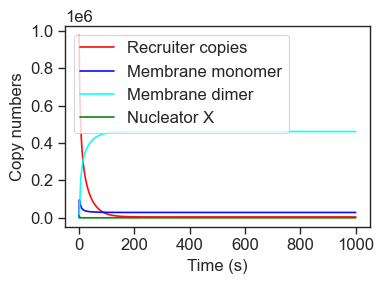

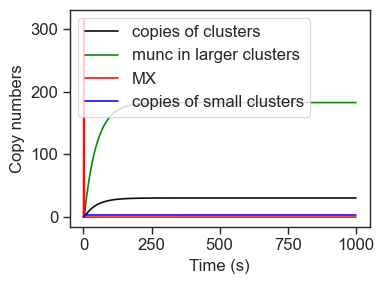

<Figure size 640x480 with 0 Axes>

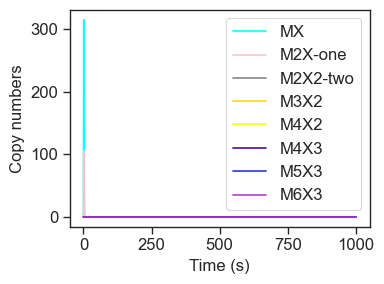

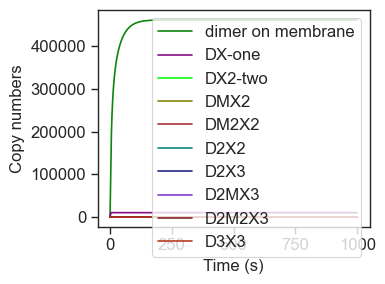

In [7]:
low1 = [0.19280917492092398, 6.345538383656195, 0.008338623061696039, 931.9281949916707, 0.027897164735378663, 0.21029166797357027, 3.6072743741489997, 16.52103503237623, 3.096341754360337, 0.6511235557542634, 2.9152867028351985, 0.004189366876445601, 0.022275726101785066, 23.831007837665823, 0.034463996588883834, 291.8346780370225, 4.199891525170765]
#low2=[0.19281, 6.3455, 0.0058888, 687.39, 0.027897, 0.21029, 3.6073, 16.521, 3.0963, 0.65112, 3.2166, 0.0031555, 0.022276, 23.831, 0.034464, 291.83, 4.1999]
#low2=[0.15019457492757146, 0.03471466177364948, 0.001, 0.0125695557090747, 0.06308754971859099, 0.566048703443486, 0.8858951965514484, 0.1816697295206523, 1.8467048647080402, 14.382393363562, 1.3345243036308372, 0.09280810695255375, 1, 5.471073149025038, 0.007646756200094223, 37.45702488861859, 0.35135134493885456]
low2=[0.2642125034075746, 0.2887430048874226, 1.6090821155934083, 0.9339522784014574, 0.0029483178916808283, 0.03148546107207491, 4.730291198372777, 4.187508823465768, 3.140067712202445, 0.06044918318120396, 24.86495534604118, 0.001, 0.09979599251960969, 13.159337961874357, 0.01, 121.85346254917246, 0.1094248861967725]
low2=[2.554781287140369, 0.001, 0.45078463135134816, 74.97397732485449, 0.1729522922844633, 497.2479634054802, 1.0259267953913058, 6.922804010289599, 0.05869353556121985, 0.07168986420329185, 2.349022359735784, 0.0025017744965558516, 0.035363164065782486, 27.10725738226453, 0.01, 205.3792639259202, 1.121801550165552]
low2=[0.9946394627161883, 0.03913110722654638, 7.557328626040687, 5.995902915346929, 0.9767574538872277, 37.4174610576011, 2.91250063991091, 0.11581759114661289, 0.6435467636367203, 30.304943014787305, 2.1181610785330225, 0.005278769491172638, 0.4033842130257309, 48.77474143281317, 0.01, 3.1755443550470797, 0.8472192758481225]
lowTest=[9.000341884408902, 0.001, 0.024874081496655306, 0.18619385334523933, 1.5027275186336115, 406.2476863737097, 0.34554369849414646, 0.5389525829509899, 3.2397843239161377, 122.75020447937611, 2.671091038217679, 0.0009596841693235142, 0.013642994096301929, 9.563695488995796, 0.01, 1.3955596985512482, 5.234777784627565]
low2=[0.07168257454819948, 0.013250901151912279, 0.004898390282115934, 0.8758297953223384, 3.0424560522918997, 0.5572946032144557, 3.380906989562066, 0.0873201942154376, 1.6329657453578934, 47.58625094166674, 3.994944925982537, 0.010344239213141886, 0.017846178557934616, 53.66285530759832, 0.02392708322122757, 2.180465003084446, 0.07362772364763508]
low2=[0.009840190744736778, 0.005103239115502532, 0.09037598420450445, 0.7831321568865671, 0.257155191043146, 0.21531707683658483, 1.8378317842744623, 1.9294226293609646, 6.960284600985927, 0.01, 2.185450593378016, 0.0001, 0.10045940175122406, 2.815740269955859, 0.003006690706092946, 173.2135416363489, 0.07298027543502422]
low2=[5.8837131875473565, 0.6572287813697282, 0.06490826608473303, 2.5863243030855982, 6.629413671535382, 1.1590395496058348, 0.5327385824001332, 0.05289095028927658, 4.165119397109582, 71.15489567065158, 7.1352032355788575, 0.008099018621459444, 0.17296144323535587, 1.191167100732555, 0.08761845157322122, 1.2083098651627855, 0.07680065438914549]
low2=[3.168689876521802, 0.0012264160429219806, 1.2326444660457405, 0.0459870953288317, 7.790016264189948, 0.6982710570975792, 0.6255438567639025, 0.05068283053795606, 1.1843839983463484, 6.371282359799749, 6.087023864946885, 0.014711656989551273, 0.01000759860969436, 7.770401125890258, 0.001, 273.0267339638671, 0.06324291971928848]
low2=[6.857017031825865, 44.07774580033118, 0.46509602833326014, 0.41125621867458395, 0.2582282665310926, 0.014430544872312146, 0.2952223146486258, 0.10575464051767629, 10, 0.7678971603389042, 0.00732273460206515, 0.043771339432393114, 0.23087665463186352, 45.29263770939414, 0.06277682126126248, 60.7406661534452, 0.069389012282451]
low2=[0.157793987088382, 0.005735011169217226, 0.19915412393565862, 1.6405340780468105, 0.44545068953623623, 2.742639756834301, 0.14476212777582723, 2.0820928874892366, 0.6511769339465802, 151.27627030149714, 0.0014882370056972418, 0.0037596162931540908, 0.06118387651552151, 3.019325668201894, 0.6877597553190984, 420.6589798363307, 0.1122205524709933]
low2=[3.480686623367432, 0.0016480081974359327, 0.0030815916573929056, 11.332675376682245, 5.101728075903431, 0.09119137427451547, 0.5557895174628356, 0.01338699228543868, 0.22802739252857335, 0.3758984600314494, 0.031701848263439206, 0.0011659372311822636, 0.03456053180508272, 11.239612698996293, 0.006758504907356912, 0.3179617656838966, 0.13372661881556638]
low2=[5.011253603461117, 0.008698236283139066, 0.7955587199575441, 0.16057999681071258, 0.24882002663242228, 0.013920984672360996, 0.01914571388077188, 0.012501480379403821, 9.603613501918618, 357.1498667681548, 0.009360162318253, 0.0018848626211645707, 0.020479171439686812, 2.465396663622287, 1.8348017612846805, 1.7441776100947617, 0.17757278789640804]
low2=[0.01051421526525053, 0.03044072930912493, 0.1, 1.8935990019766906, 1.7632516989451745, 0.08924386093927962, 7.320899056342131, 0.01039410587275648, 2.1392965322906576, 0.35951349977594294, 0.1986384394523206, 0.23281057205768915, 0.16338116994347227, 74.68547919571311, 1.0473194764606142, 0.5038548147155066, 0.1]
low2=[1.1990145978837494, 64.84254182874511, 0.3838997280253884, 0.5427768726647392, 1.782850339268213, 148.8899140208131, 10, 1.9088670410827975, 1.8204514120747222, 0.0197967436179174, 0.001621974347079779, 0.011528162104348018, 0.5023000634811141, 3.676618776948492, 4.9767507118835805, 88.0721048124962, 0.1]
low2=[2.121177520516991, 0.18396834046949065, 0.19312006429749384, 0.012332182349836877, 0.5458031598843938, 11.623217761695415, 0.3984679351530142, 110.95683127190667, 1.9578523880296688, 1.0367969503082282, 0.02027056531990607, 0.00514486221193805, 0.606821603097497, 3.9595525238802867, 0.004799261263367555, 4.54159101445122, 0.09641561281550895]
low2=[0.82439, 0.27787, 0.14369, 0.70141, 1.2516, 0.071342, 1.3639, 0.080172, 0.098181, 0.3466, 0.16538, 0.031533, 0.017389, 1.7038, 0.13265, 50.545, 0.11378]
low2=[0.28005689619623975, 7.1170241978440725, 8.697432960203972, 1.157742601671254, 9.009252720524655, 0.18237412569868677, 0.0027360275004156766, 0.044042042263975525, 0.8238317084168036, 18.457812364107312, 1, 0.001, 0.43766442299408775, 4.8471506068564985, 0.00709446604372207, 363.86085241862236, 0.1388434874560452]
low2=[0.009922313848025562, 0.21660715502295752, 1.3631282058673133, 2.0419654660812707, 3.3252676655491675, 165.49929717358265, 0.20146550300976532, 0.016589842939129663, 4.740332611854213, 0.015509378285201018, 0.651165848700184, 0.03730084543444053, 0.049386303013569895, 4.037977792193313, 0.7565557311994856, 8.869051635813294, 0.09292593309853167]
long1=[0.005644053666706447, 1.2452708990928643, 10, 0.7256057239023725, 0.12065605084364385, 113.26422719864105, 0.032615690203497326, 407.1664406815067, 4.558167052690961, 0.044475076851969254, 0.19789464214366048, 0.32464199639565383, 0.09130391977101636, 3.250038361080891, 0.6364642998482137, 364.7594452830439, 0.12771361797905648, 1.714882429177279, 0.0001, 0.6212684948234548, 0.004007279383775584, 0.8024518420800264]
life1=[0.011729086119261484, 0.9056606570744709, 0.5262982380535077, 2.08464729443242, 10, 21.323927299908082, 0.0229767218732967, 881.7504763812663, 1.967259363283317, 0.12763671995472095, 0.006456096892730929, 0.06694575383230575, 0.12897738016342666, 16.46109358110975, 0.053899725854495914, 565.5189829017578, 0.12098865906159197, 2.2696831211744324, 0.0001630757741728449, 9.35182548801282, 0.10723754713598314, 3.8431086951515963]
life1=[0.004609013377228104, 0.08885944543437349, 0.8753382636183852, 0.03995119069213762, 0.20455370649036522, 9.54630727433758, 0.0029197290715561926, 446.7481031044534, 1.5123782667803358, 4.375889069364388, 0.5833035098545549, 0.13199489560803657, 0.03284409613515212, 4.589554157758037, 7.132379636525951, 22.592880250088992, 0.34178984239193505, 0.617782091818219, 1e-26, 0.6761540592763952, 0.009126548460968475, 1e-26]
life1=[9.966649449904425, 0.7199313950457704, 0.1546086476700792, 0.18444579311346354, 0.30945781084443824, 39.702450918039084, 0.002772924052553519, 351.5281512366534, 0.11098410305168574, 0.08014017175814321, 0.9349152846393759, 0.20141396052096386, 0.05659768883714344, 5.339156731273984, 9.23522324987552, 233.90089534221286, 0.38846954090844177, 0.5157450364103945, 1e-26, 0.6176289975107814, 0.021843982507158043, 1e-26]
life2=[3.9665667538239897, 0.03580167335415792, 0.052633444275614547, 173.82078072597275, 2.273656908120863, 150.22079802276386, 5.256670469063952, 2.8752570317398214, 1.5941682916770303, 0.16674482038117555, 0.3271271726160511, 0.3233472890406523, 0.01945355107151576, 7.318493846501851, 1.5304841462787062, 37.84389026756309, 0.08707357042800683, 0.06910712702603801, 1e-26, 3.513890982232384, 0.14683034711365628, 1e-26, 0.00406991852906314]
life2=[0.02041403604829406, 8.730055569641387, 0.022438028263330762, 448.66778474979924, 3.4079713328986636, 1.0581340743169696, 0.24538013289345012, 0.03332188662572451, 5.327077277153559, 0.06540240309941957, 10, 0.0026731220396005195, 0.016062063757431178, 1.0182313154704534, 4.448173191275991, 514.4147081307898, 0.06057675211387262, 10, 1e-26, 145.70141889364763, 1.6426272244706452, 1e-26, 0.15907292172608803]
life2=[1.427968912397607, 0.01215587613638021, 0.022325050789483932, 0.1884731089654168, 1.0502035383033668, 0.08104107169064895, 0.00207844312646533, 168.84955446315615, 0.5726988096425077, 48.52527068205569, 1.2345694145837987, 1.8089151080734192, 0.357825844618785, 2.748119533838825, 0.16116118746567581, 535.4676250166963, 1.6157029301537922, 1.355025693630126, 1e-26, 987.1830803462083, 5.337809853063015, 1e-26, 4.869461869026584]
life2=[0.08282760596715134, 0.0051484207312333845, 0.042822145447267035, 0.01, 0.11099769033989708, 39.61248468343635, 0.8835908965615725, 32.15309237460839, 0.14624711192893036, 617.760143398135, 0.0018627654902854578, 0.044295467745721684, 0.011204446433168851, 17.662930363916004, 2.1100529914979025, 777.7928963623059, 8.246945553631093, 0.2505503985576388, 1e-26, 39.455498458122264, 0.20214776963346942, 1e-26, 0.008229475317807928]
remC=long1
remC[17]=0.0
test_candidate=life2
sol=model.simulate_pre(test_candidate)
print(sol[:,-1]*model.cellVolume*602.0)
print(test_candidate)
fit = model.fitness_function_to_call(test_candidate)
print("fitness of this candidate: ", fit)
model.test_mass_conservation(sol)
model.plot_freespecies_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
#model.plot_cluster_kinetic(sol, figsize=(4, 3), fontsize=12

In [8]:
#calculate the lifetime of the cluster
tau46, tau56 = model.calculate_lifetime_of_clusters(sol, test_candidate)
print(f"Cluster lifetimes (s) tau46: {tau46}, tau56: {tau56}")


Cluster lifetimes (s) tau46: 46.56666980521734, tau56: 46.56668769259678


Initial total Munc13 993263.6604061859, final total Munc 1969367.7742293351
Initial total R 4502.733225574575, final total R 976907.8778296817
Initial total X 0.09668199501705774, final total X 10358.163615351887
Initial total C 631480.5431807113, final total C 631480.5431807113


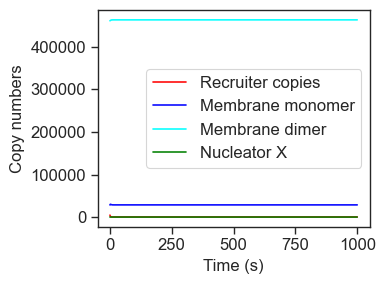

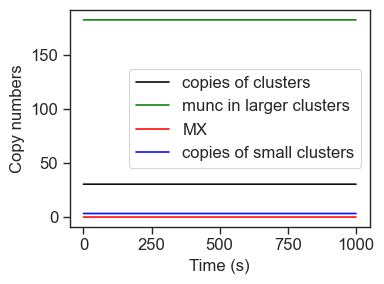

<Figure size 640x480 with 0 Axes>

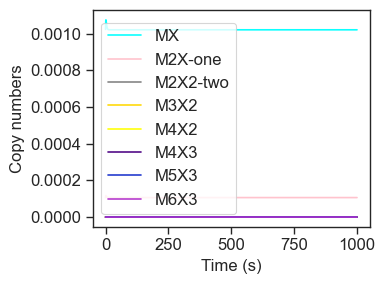

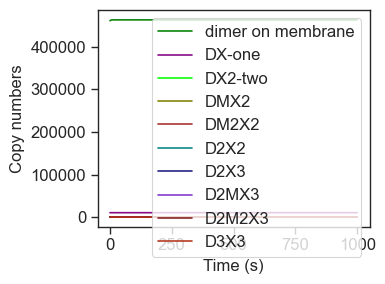

differential post and pre [-5.48120099e+02 -4.24708921e+03  6.45991073e+01  2.09124461e+03
 -4.36056866e-04 -2.30923538e-06 -5.40182661e-07  9.66501573e-12
  4.26643529e-04 -1.44895232e-15 -1.40078637e-07 -7.67325148e-18
 -7.41814832e-10 -1.47081214e-22 -2.11024841e-15  2.74142445e-07
 -4.82378656e-20 -5.09671683e-09 -3.61647642e-21 -3.78191383e-11
 -2.25208437e-18 -8.78108429e-10  4.00476280e-06  0.00000000e+00
  1.36739134e-24  2.18978860e-22  2.54383563e-20 -1.84948456e+03]
ratio post and pre  [9.99448163e-01 5.67752964e-02 1.00226281e+00 1.00453072e+00
 9.95489782e-01 9.97742389e-01 9.94940431e-01 1.00000009e+00
 1.00000004e+00 9.95489873e-01 9.95489824e-01 9.97742433e-01
 9.97742389e-01 9.99999583e-01 9.99999938e-01 1.00000008e+00
 5.18850307e-03 9.92258273e-01 7.37121161e-04 9.94854340e-01
 6.61268021e-05 9.98677100e-01 1.00000013e+00 1.00000000e+00
 1.00226281e+00 1.00453072e+00 2.05044897e+00 9.98896638e-01]
copies pre:  [9.93263660e+05 4.50273323e+03 2.85481414e+04 4.61570435e

In [9]:
#what is the total recruitment to the membrane and how does it change following dimer deletion?
solPost=model.simulate_post(test_candidate, sol)
model.test_mass_conservation(solPost)
model.plot_freespecies_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)

#calculate the change in each final species pre and post
change=solPost[:,-1]-sol[:,-1]
ratio=solPost[:,-1]/sol[:,-1]
print("differential post and pre", change*model.cellVolume*602)
print("ratio post and pre ", ratio)
print("copies pre: ", sol[:,-1]*model.cellVolume*602)
print("copies post: ", solPost[:,-1]*model.cellVolume*602)

In [10]:
pclus, pclusMem, pmem, pMono, pDimer = model.calc_percentages_cluster(sol)
copies= sol*model.cellVolume*602
print(copies[:,-1])
print("percent on mem in cluster", pclusMem*100)
print("percent on membrane ", pmem*100)
D_wt = model.calculate_population_average_diffusion(sol)
print("average populations diffusivity: ", D_wt)

print("RESULT POST STIMULATION: ")
pclus, pclusMem, pmem, pMono, pDimer = model.calc_percentages_cluster(solPost)
copies= solPost*model.cellVolume*602
print(copies[:,-1])
print("percent on mem in cluster", pclusMem*100)
print("percent on membrane ", pmem*100)
D_wt = model.calculate_population_average_diffusion(solPost)
print("POST STIM average populations diffusivity: ", D_wt)

[9.93263660e+05 4.50273323e+03 2.85481414e+04 4.61570435e+05
 9.66819950e-02 1.02286683e-03 1.06764564e-04 1.06130060e-04
 1.02600968e+04 3.21266392e-13 3.10583494e-05 3.39890332e-15
 3.28584034e-07 3.52661789e-16 3.40880040e-08 3.29597719e+00
 4.84894533e-20 6.58343634e-07 3.61914416e-21 7.34971598e-09
 2.25223330e-18 6.63775167e-07 3.04589654e+01 6.31480543e+05
 6.04288247e-22 4.83320636e-20 2.42166511e-20 1.67622624e+06]
percent on mem in cluster 0.01879399728414401
percent on membrane  49.46942954340668
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X3, 0.0003252032520325203. DtD3X3 0.0003252032520325203. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 972405.1446041067. M 28548.141388066157. D 461570.4353247461. 
average populations diffusivity:  0.0403428261566677
RESULT POST STIMULATION: 
[9.92715540e+05 2.55644013e+02 2.86127405e+04 4.63661680e+05
 9.62459382e-02 1.02055759e-03 1.06224382e-04 1.06130070e-04
 1.02600972e+04 3.19817440e-13 3.09182708e-05 3.39123007e-15
 3.27842

In [11]:
copies= sol * model.cellVolume * 602  # converts from uM to copy numbers.
density = model.calculate_cluster_density(sol)
print("dimensions of density array: ",density.shape)
print("length of density array : ", len(density))
L=copies.shape[1]
print(L)
n75=np.int64(L*0.75)
#look at change in copy numbers over the final 75%. >0 means increasing
print(copies.shape)
delta = copies[:,-1]-copies[:,n75]
mx=copies[5]
x=copies[4]
print("75% mx ", mx[n75])
print("final mx: ", mx[-1])
print("75percent  x ", x[n75])
print("final X: ", x[-1])
print("initial total Munc ", copies[0][0])
print("initial total R ", copies[1][0])
print("initial total X ", copies[4][0])
print("concentration of Munc in uM: ", copies[0][0]/(model.cellVolume*602))
print("binding of X to X, and dGXX (kT)", test_candidate[8], test_candidate[9], np.log(test_candidate[9]*1e-6/test_candidate[8]))
print("binding of M to X, and dGMX: ", test_candidate[4], test_candidate[5],np.log(test_candidate[5]*1e-6/test_candidate[4]))
print("binding of M to cluster, and dGC: ", test_candidate[6], test_candidate[7], np.log(test_candidate[7]*1e-6/test_candidate[6]))

print("binding of S to R, dGSR: ", test_candidate[0], test_candidate[1], np.log(test_candidate[1]*1e-6/test_candidate[0]))
print(" dimerization, dGMM ", test_candidate[2], test_candidate[3], np.log(test_candidate[3]*1e-6/test_candidate[2]))
print(" dimerization dG eDF, eMLoop, eDLoop ", test_candidate[11], test_candidate[10], test_candidate[22])
print(" convert from monomers to dimer in cluster ", test_candidate[12])
print(delta.shape)
print(delta)

dimensions of density array:  (2001,)
length of density array :  2001
2001
(28, 2001)
75% mx  0.0010228668304567692
final mx:  0.0010228668301282666
75percent  x  0.09668199504844839
final X:  0.09668199501705774
initial total Munc  5318121.291691541
initial total R  976907.8778310562
initial total X  10358.16361536065
concentration of Munc in uM:  2.1100529914979025
binding of X to X, and dGXX (kT) 0.14624711192893036 617.760143398135 -5.466952752762763
binding of M to X, and dGMX:  0.11099769033989708 39.61248468343635 -7.938120333972206
binding of M to cluster, and dGC:  0.8835908965615725 32.15309237460839 -10.221240815912438
binding of S to R, dGSR:  0.08282760596715134 0.0051484207312333845 -16.593581955670423
 dimerization, dGMM  0.042822145447267035 0.01 -15.269980850736184
 dimerization dG eDF, eMLoop, eDLoop  0.044295467745721684 0.0018627654902854578 0.008229475317807928
 convert from monomers to dimer in cluster  0.011204446433168851
(28,)
[-1.42271165e-06  2.99136991e-06  

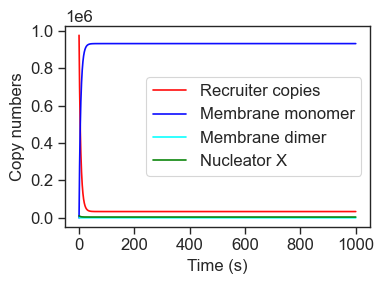

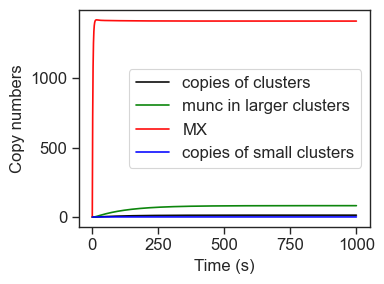

<Figure size 640x480 with 0 Axes>

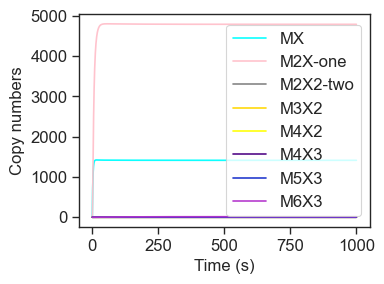

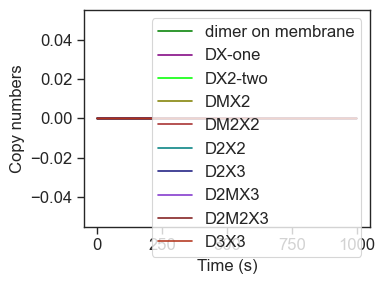

In [12]:
# Now evaluate the mutants, which will require new simulations
#first is the mutant C2A, which eliminates dimerization.
candidate_dc2a=list(test_candidate)
candidate_dc2a[2] = 0 #this sets kfmm to zero.
candidate_dc2a[12] = 0 #this sets kfdd to zero (no in cluster transition to 2M->D)
        
mutantC2A_pre = model.simulate_pre(candidate_dc2a)


model.plot_freespecies_time(mutantC2A_pre, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(mutantC2A_pre, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(mutantC2A_pre, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(mutantC2A_pre, figsize=(4, 3), fontsize=12, dpi=300)

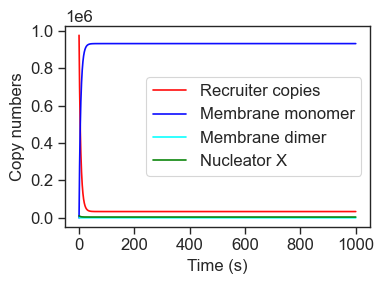

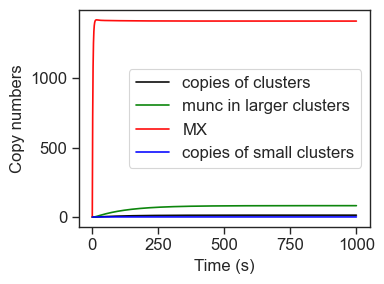

<Figure size 640x480 with 0 Axes>

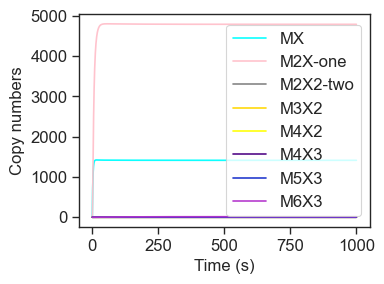

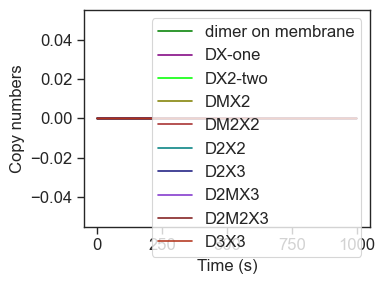

In [13]:
mutantC2A_post = model.simulate_pre(candidate_dc2a)


model.plot_freespecies_time(mutantC2A_post, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(mutantC2A_post, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(mutantC2A_post, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(mutantC2A_post, figsize=(4, 3), fontsize=12, dpi=300)

CALCULATE DIFFUSIVITY OF WT AND MUTAN

In [14]:
print("percent on mem in cluster", pclusMem*100)
print("percent on membrane ", pmem*100)
print("percent in monomers on mem: ", pMono*100)
print("percent in dimers on membrane: ", pDimer*100)
pclus, pclusMem, pmem, pMono,pDimer = model.calc_percentages_cluster(mutantC2A_pre)
print("MUTANT percent on mem in cluster", pclusMem*100)
print("MUTANT percent on membrane ", pmem*100)
print("MUTANT percent in monomers on mem: ", pMono*100)
print("MUTANT percent in dimers on membrane: ", pDimer*100)
D_wt = model.calculate_population_average_diffusion(sol)
print("average populations diffusivity: ", D_wt)
D_mutant = model.calculate_population_average_diffusion(mutantC2A_pre)
print("MUTANT average populations diffusivity: ", D_mutant)

percent on mem in cluster 0.018712271795740663
percent on membrane  49.59217097977334
percent in monomers on mem:  2.9296754263880675
percent in dimers on membrane:  94.9491874149539
MUTANT percent on mem in cluster 0.008709150414159454
MUTANT percent on membrane  17.741521807653843
MUTANT percent in monomers on mem:  98.82559547724117
MUTANT percent in dimers on membrane:  0.0
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X3, 0.0003252032520325203. DtD3X3 0.0003252032520325203. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 972405.1446041067. M 28548.141388066157. D 461570.4353247461. 
average populations diffusivity:  0.0403428261566677
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X3, 0.0003252032520325203. DtD3X3 0.0003252032520325203. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 943515.6487238922. M 932434.9582723414. D 0.0. 
MUTANT average populations diffusivity:  0.07907189288703409


[2.11005299 1.9072225  1.7404127  ... 0.39409386 0.39409386 0.39409386]
[0.08282760596715134, 0.0051484207312333845, 0.042822145447267035, 0.01, 0.11099769033989708, 39.61248468343635, 0.8835908965615725, 32.15309237460839, 0.14624711192893036, 617.760143398135, 0.0018627654902854578, 0.044295467745721684, 0.011204446433168851, 17.662930363916004, 2.1100529914979025, 777.7928963623059, 8.246945553631093, 0.2505503985576388, 1e-26, 39.455498458122264, 0.20214776963346942, 1e-26, 0.008229475317807928]
Cluster density chi: Simulated 0.02425076917132725, Experimental 0.024375, Chi -0.00012987917458698027
Small cluster density chi: Simulated 0.0026241864732583675, high density 0.02425076917132725, Chi -0.001991095561256425
Percent of mem munc13 in clusters: 0.01879399728414401%. Percent munc13 on the membrane: 49.46942954340668%. Monomer mem: 2.9358278847536234%. Dimer mem: 94.93377074072646%
Change in density over last 25%: 8.91231491384481e-10, associated chi: -1.3368828412801054e-14
Clus

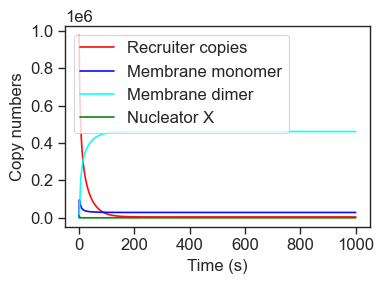

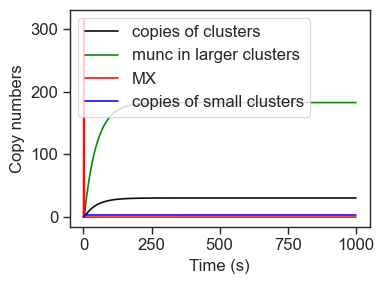

<Figure size 640x480 with 0 Axes>

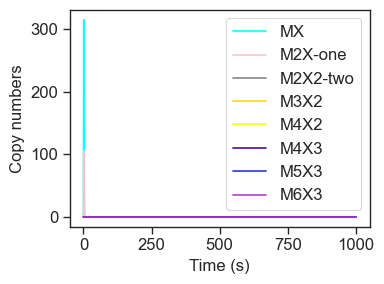

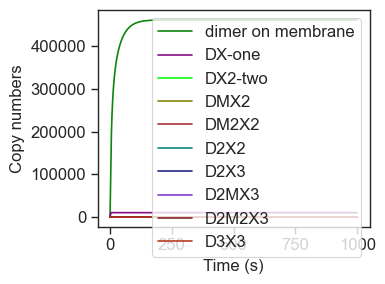

In [15]:
sol=model.simulate_pre(test_candidate)
print(sol[0])
print(test_candidate)
fit = model.fitness_function_to_call(test_candidate)
print("fitness of this candidate: ", fit)
model.test_mass_conservation(sol)
model.plot_freespecies_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)

In [16]:
#check what happents to the WT when ksr is lowered 
pip_candidate = list(test_candidate)
pip_candidate[0]=test_candidate[0]*0.01
#[ 4.96837050e+00  3.55095404e-02  3.26229677e-03  2.50912413e-03
#  8.07949209e-15  1.04750784e-16  4.80498959e-16  5.47005971e-16
#  2.20774808e-08  3.90765317e-21  2.48683319e-13  5.08853104e-23
##  3.23879314e-15  2.90078902e-22  1.84998305e-14  8.14878120e-06
 #-2.29054119e-23  2.46609799e-17 -2.41364978e-25  2.99265062e-19
 # 8.55263608e-11  2.56303563e-14  1.11713300e-05]
pipSol=model.simulate_pre(pip_candidate)
print(pipSol[:,-1])
#pipPost=model.simulate_post(pip_candidate, pipSol)
fit=model.fitness_function_to_call(pip_candidate)

[4.28711273e-01 2.86750484e-01 5.73588758e-03 4.34494199e-02
 1.61760754e-07 8.66915576e-10 1.94049988e-10 4.55484991e-11
 4.07074303e-03 5.81424648e-19 5.19628575e-11 3.11505466e-21
 2.78395756e-13 1.63714996e-22 1.46301641e-14 1.30765607e-06
 6.42099243e-28 2.44665693e-12 1.29036505e-29 1.31891839e-14
 6.61225649e-27 4.25590427e-13 1.20840702e-05 2.50550399e-01
 1.21412397e-28 4.54922343e-27 9.01938066e-27 7.90243885e-01]
Cluster density chi: Simulated 0.024248701815427605, Experimental 0.024375, Chi -0.0001342378450075097
Small cluster density chi: Simulated 0.002624035340983565, high density 0.024248701815427605, Chi -0.001991651594408044
Percent of mem munc13 in clusters: 0.07189051523864254%. Percent munc13 on the membrane: 19.04467011163561%. Monomer mem: 5.687320726059902%. Dimer mem: 86.1630508178259%
Change in density over last 25%: 8.712779632248646e-07, associated chi: -1.2826189972438141e-08
Cluster lifetimes: tau46 46.56638561413871, tau56 46.56647474835171
Cluster densit

In [17]:
#check what happens to the WT when R is lowered. 
rec_candidate=list(test_candidate)
rec_candidate[15]=test_candidate[15]*0.01
recSol=model.simulate_pre(rec_candidate)
recPost=model.simulate_post(rec_candidate, recSol)
fit=model.fitness_function_to_call(rec_candidate)

Cluster density chi: Simulated 0.0024625135242318835, Experimental 0.024375, Chi -4.040769502596466
Small cluster density chi: Simulated 0.0005954975166132528, high density 0.0024625135242318835, Chi -0.003492461641900644
Percent of mem munc13 in clusters: 0.19034617516004124%. Percent munc13 on the membrane: 0.8696136031989204%. Monomer mem: 1.404348587669212%. Dimer mem: 0.0928108278168147%
Change in density over last 25%: 3.9022334643716485e-05, associated chi: -2.6110547823137188e-05
Cluster lifetimes: tau46 46.429611033553975, tau56 46.47099919978767
Cluster density chi: Simulated 1.9678760124948713e-13, Experimental 0.0109375, Chi -4.999999999820081
Small cluster density chi: Simulated 1.1469796303957459e-09, high density 1.9678760124948713e-13, Chi -1.146959951635621e-08
Percent of mem munc13 in clusters: 1.5492679763383508e-11%. Percent munc13 on the membrane: 0.1784492412063653%. Monomer mem: 99.595268812549%. Dimer mem: -2.0954190627964975e-24%
Change in density over last 25%

In [18]:
copies= sol * model.cellVolume * 602  # converts from uM to copy numbers.

In [19]:
copies[:,-1]

array([9.93263660e+05, 4.50273323e+03, 2.85481414e+04, 4.61570435e+05,
       9.66819950e-02, 1.02286683e-03, 1.06764564e-04, 1.06130060e-04,
       1.02600968e+04, 3.21266392e-13, 3.10583494e-05, 3.39890332e-15,
       3.28584034e-07, 3.52661789e-16, 3.40880040e-08, 3.29597719e+00,
       4.84894533e-20, 6.58343634e-07, 3.61914416e-21, 7.34971598e-09,
       2.25223330e-18, 6.63775167e-07, 3.04589654e+01, 6.31480543e+05,
       6.04288247e-22, 4.83320636e-20, 2.42166511e-20, 1.67622624e+06])

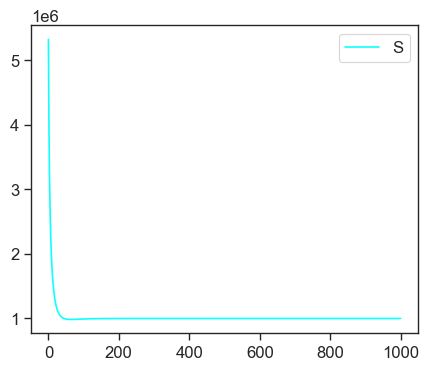

In [20]:
fig, ax = plt.subplots(figsize=(5,4))
#ax.plot(self.timePoints, copies[2], linestyle="-", label="Monomer on membrane", color="black", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[0], linestyle="-", label="S", color="cyan", alpha=0.95, zorder=3)
ax.legend()

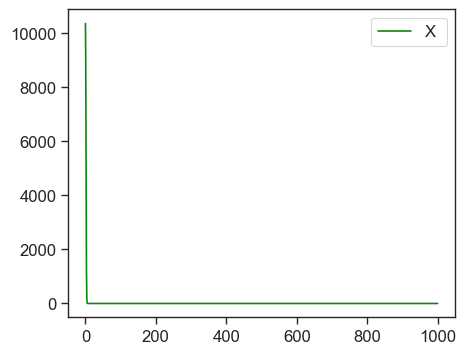

In [21]:
fig, ax = plt.subplots(figsize=(5,4))
#ax.plot(self.timePoints, copies[2], linestyle="-", label="Monomer on membrane", color="black", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[4], linestyle="-", label="X ", color="green", alpha=0.95, zorder=3)
ax.legend()

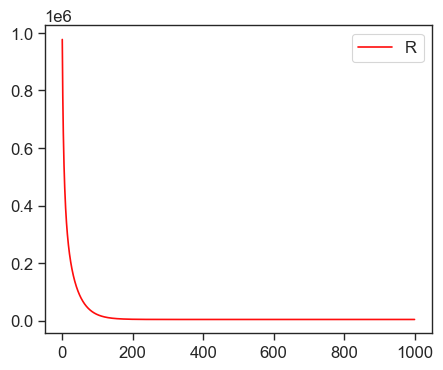

In [22]:
fig, ax = plt.subplots(figsize=(5,4))
#ax.plot(self.timePoints, copies[2], linestyle="-", label="Monomer on membrane", color="black", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[1], linestyle="-", label="R", color="red", alpha=0.95, zorder=3)
ax.legend() 

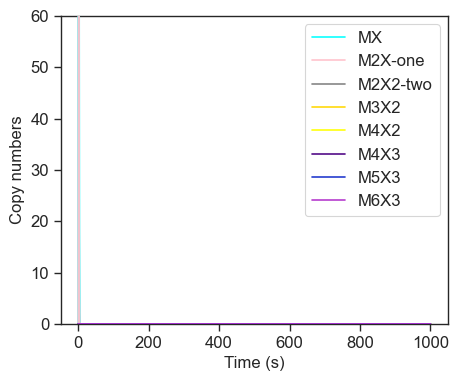

In [23]:
fig, ax = plt.subplots(figsize=(5,4))
#ax.plot(self.timePoints, copies[2], linestyle="-", label="Monomer on membrane", color="black", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[5], linestyle="-", label="MX", color="cyan", alpha=0.95, zorder=3)
       # ax.plot(self.timePoints, copies[4], linestyle="-", label="X", color="blue", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[7], linestyle="-", label="M2X-one", color="pink", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[9], linestyle="-", label="M2X2-two", color="gray", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[11], linestyle="-", label="M3X2", color="gold", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[13], linestyle="-", label="M4X2", color="yellow", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[16], linestyle="-", label="M4X3", color="indigo", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[18], linestyle="-", label="M5X3", color=(0.1, 0.2, 0.8), alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[20], linestyle="-", label="M6X3", color=(0.7, 0.2, 0.8), alpha=0.95, zorder=3)
        
        #ax.plot(self.timePoints, copies[2], linestyle="-", label="Membrane monomer", color="blue", alpha=0.95, zorder=3)
        #ax.plot(self.timePoints, copies[3], linestyle="-", label="Membrane dimer", color="cyan", alpha=0.95, zorder=3)
ax.set_xlabel("Time (s)")
       #
ax.set_ylabel("Copy numbers")
#ax.set_xlim(0, 10)
ax.set_ylim(0, 60)
ax.legend()

final dimer copies:  461570.4353247461


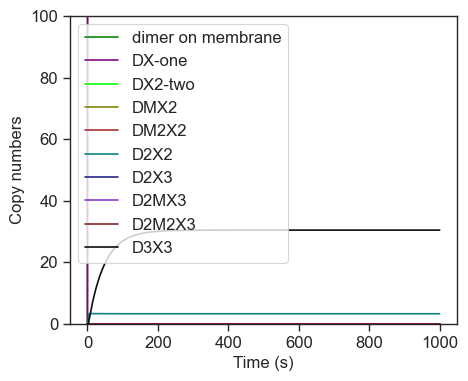

In [24]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(model.timePoints, copies[3], linestyle="-", label="dimer on membrane", color="green", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[8], linestyle="-", label="DX-one", color="purple", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[10], linestyle="-", label="DX2-two", color="lime", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[12], linestyle="-", label="DMX2", color="olive", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[14], linestyle="-", label="DM2X2", color="brown", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[15], linestyle="-", label="D2X2", color="teal", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[17], linestyle="-", label="D2X3", color=(0.1, 0.1, 0.5), alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[19], linestyle="-", label="D2MX3", color=(0.5, 0.2, 0.8), alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[21], linestyle="-", label="D2M2X3", color=(0.5, 0.1, 0.1), alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[22], linestyle="-", label="D3X3", color="black", alpha=0.95, zorder=3)
        
        #ax.plot(self.timePoints, copies[2], linestyle="-", label="Membrane monomer", color="blue", alpha=0.95, zorder=3)
        #ax.plot(self.timePoints, copies[3], linestyle="-", label="Membrane dimer", color="cyan", alpha=0.95, zorder=3)
ax.set_xlabel("Time (s)")
       #
ax.set_ylabel("Copy numbers")
print("final dimer copies: ",copies[3,-1])
        #ax.set_xlim(0, 10)
ax.set_ylim(0, 100)
ax.legend()

Total solutions loaded: 72786
Using top 35% by Rank -> 25475 solutions.
Saved summary to: param_rangeFig.png


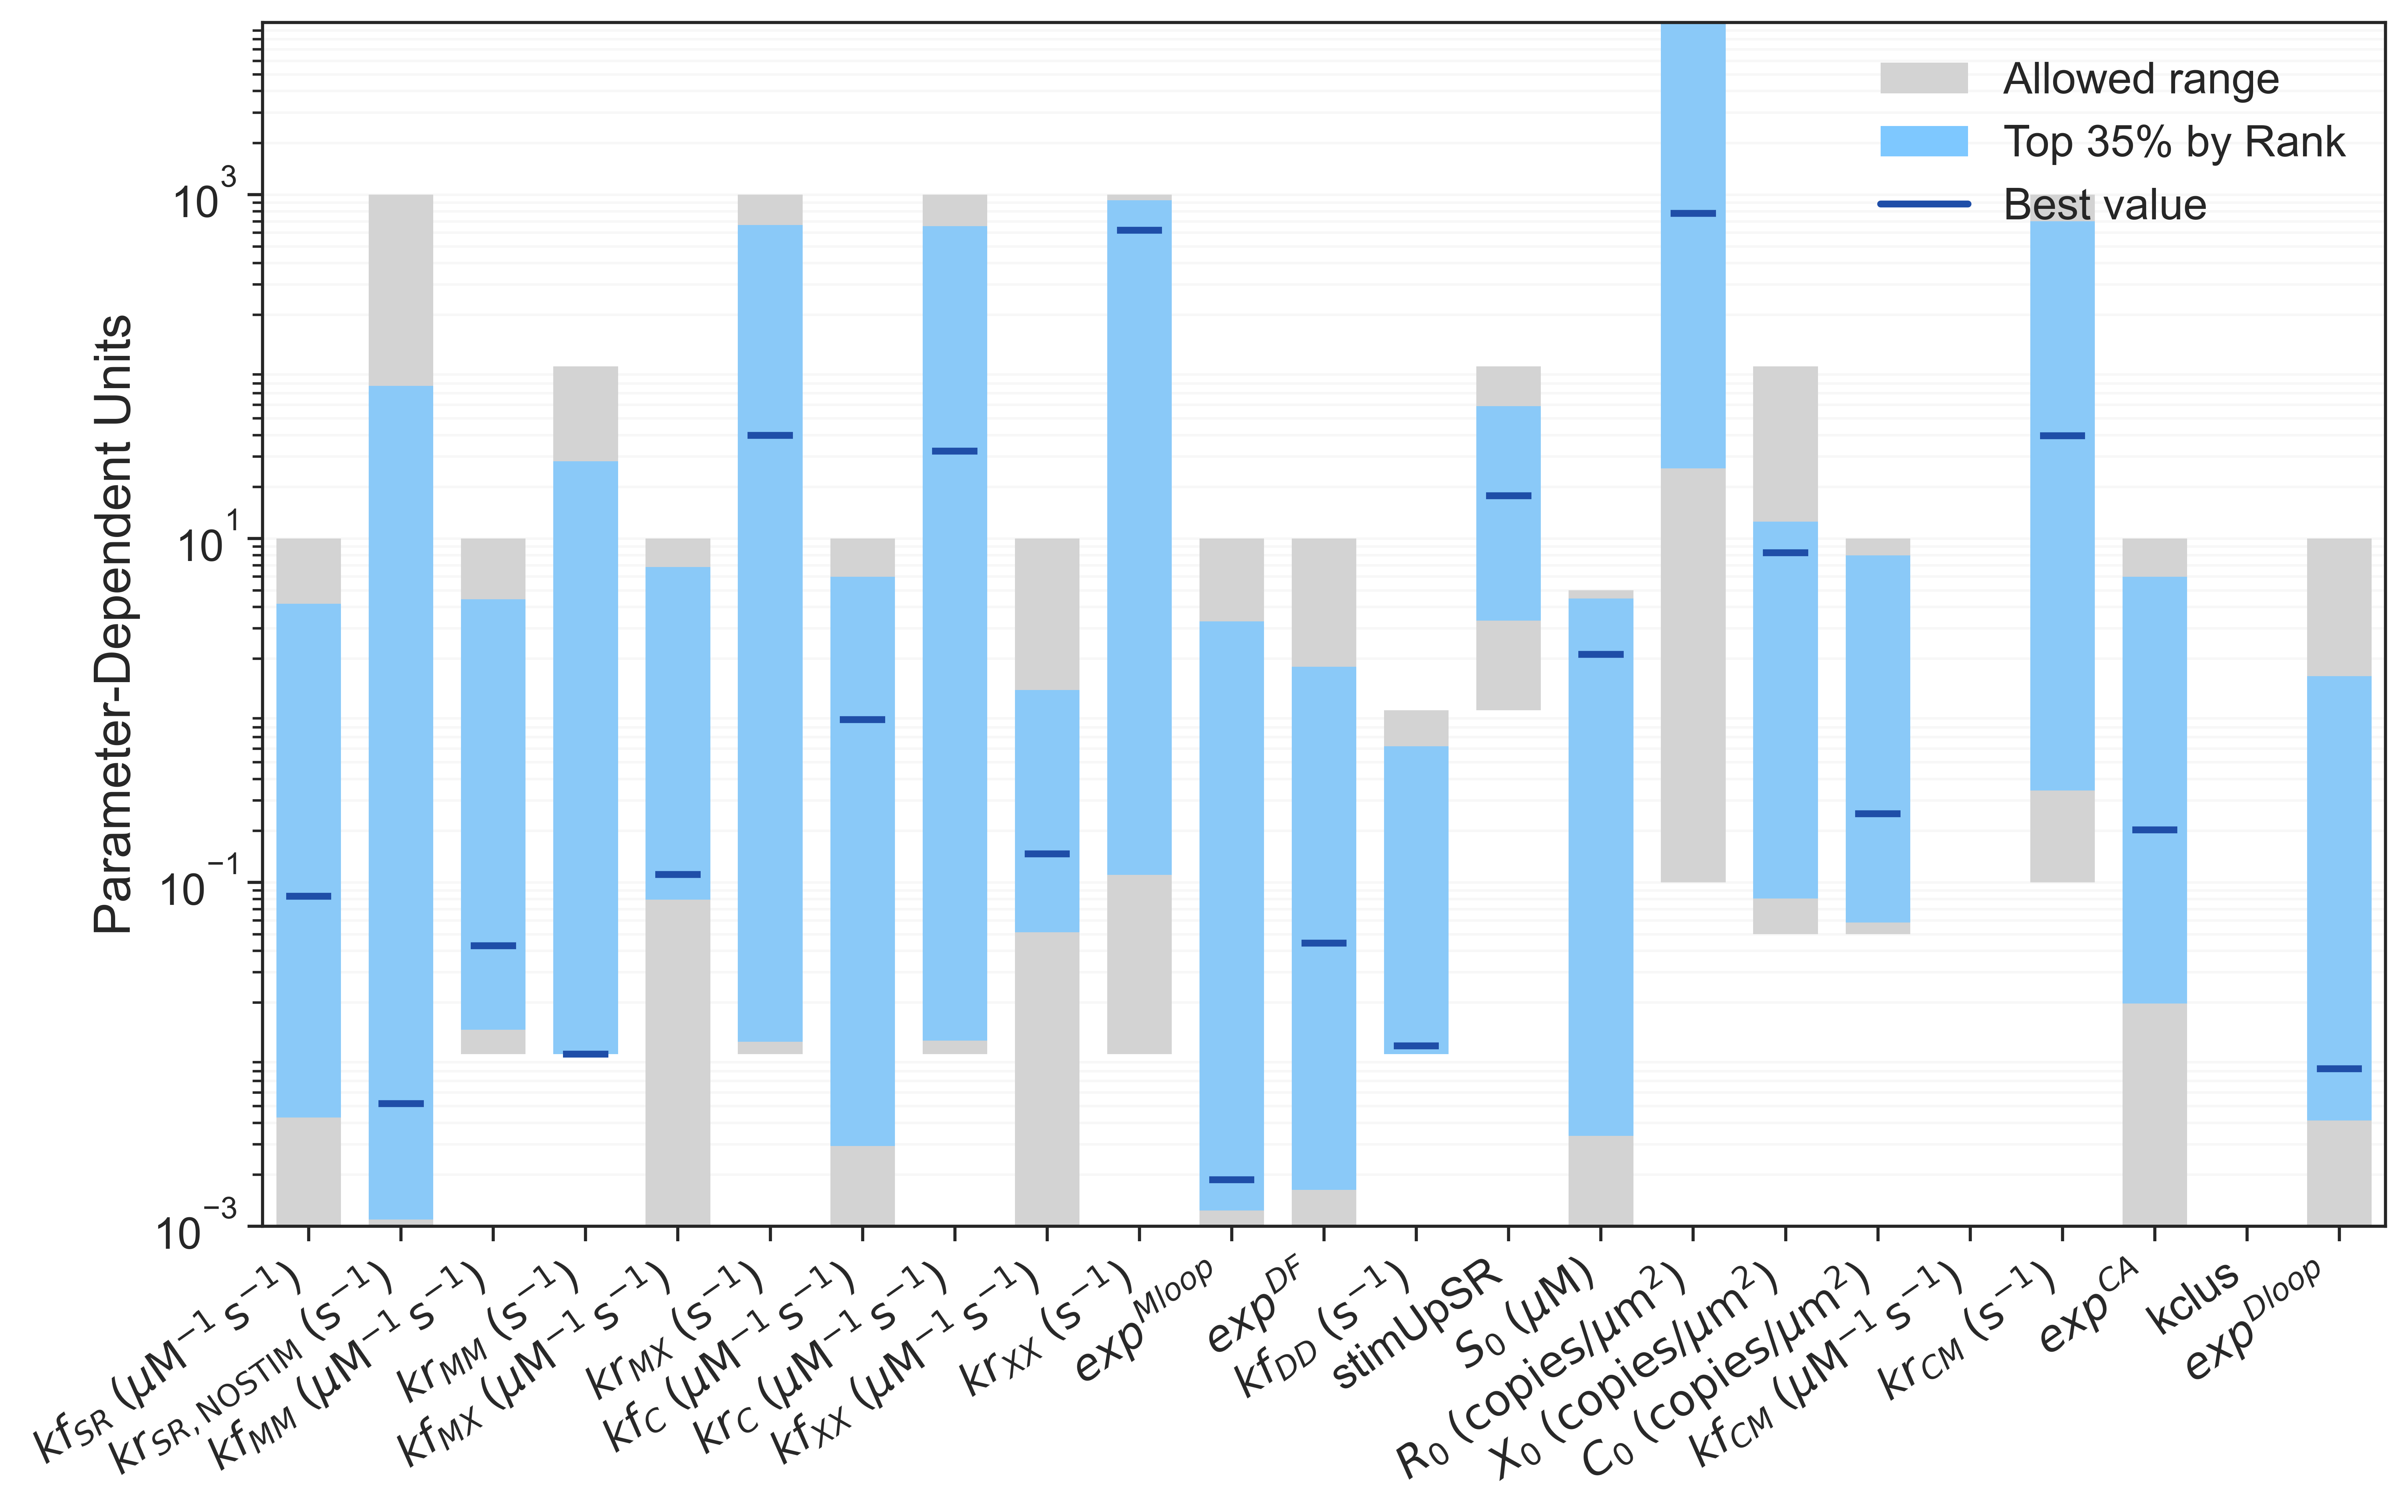

In [31]:

#create a plot of parameter ranges found
fileName = "../data/testParms_withCA_Lifetimes_324.txt"

#THIS COMMAND BELOW BREAKS THE MODEL DEFINITION.
model.plot_parameter_ranges_summary(percent=35, parameter_ranges = parameter_ranges, save_path="param_rangeFig.png",inputFile = fileName)


#best = 300
#totalTime = 10
#dt = 0.1
#model.filter_and_store_solutions(best=best, totalTime=totalTime, dt=dt)

In [32]:
#read in all solutions in the output file.
import pandas as pd
dataF = pd.read_csv(fileName, sep=",", engine="python")
dataF.columns = dataF.columns.str.strip()
dataF = dataF.sort_values(by="Rank")
print(dataF.shape)
print(dataF.loc[2500])
#store the parameters in the param_cols vector
param_cols = [col for col in dataF.columns if col not in ["Rank", "Fitness"]]
print(param_cols)




(72786, 25)
Rank        2.500000e+03
Fitness    -1.093900e+00
kfsr        7.970600e-02
krsr        5.148400e-03
kfmm        1.670800e-02
krmm        1.084900e-02
kfmx        2.226800e-01
krmx        5.257900e+01
kfc         8.835900e-01
krc         3.672800e+01
kfxx        1.462500e-01
krxx        6.177600e+02
eMLoop      8.170500e-03
eDF         5.284000e-02
kfdd        1.295600e-02
stimUpSR    1.766300e+01
S0          2.110100e+00
R0          1.601800e+03
X0          8.345900e+00
C0          3.100800e-01
kfcm        1.000000e-26
krcm        3.945500e+01
eCA         2.021500e-01
kclus       1.000000e-26
eDLoop      8.229500e-03
Name: 2500, dtype: float64
['kfsr', 'krsr', 'kfmm', 'krmm', 'kfmx', 'krmx', 'kfc', 'krc', 'kfxx', 'krxx', 'eMLoop', 'eDF', 'kfdd', 'stimUpSR', 'S0', 'R0', 'X0', 'C0', 'kfcm', 'krcm', 'eCA', 'kclus', 'eDLoop']


In [35]:
whichRow=20
# Convert row to array of parameter values
sol=model.simulate_pre(test_candidate)
print(sol[0])
print(test_candidate)
fit = model.fitness_function_to_call(test_candidate)
print("fitness of this candidate: ", fit)

[2.11005299 1.9072225  1.7404127  ... 0.39409386 0.39409386 0.39409386]
[0.08282760596715134, 0.0051484207312333845, 0.042822145447267035, 0.01, 0.11099769033989708, 39.61248468343635, 0.8835908965615725, 32.15309237460839, 0.14624711192893036, 617.760143398135, 0.0018627654902854578, 0.044295467745721684, 0.011204446433168851, 17.662930363916004, 2.1100529914979025, 777.7928963623059, 8.246945553631093, 0.2505503985576388, 1e-26, 39.455498458122264, 0.20214776963346942, 1e-26, 0.008229475317807928]
Cluster density chi: Simulated 0.02425076917132725, Experimental 0.024375, Chi -0.00012987917458698027
Small cluster density chi: Simulated 0.0026241864732583675, high density 0.02425076917132725, Chi -0.001991095561256425
Percent of mem munc13 in clusters: 0.01879399728414401%. Percent munc13 on the membrane: 49.46942954340668%. Monomer mem: 2.9358278847536234%. Dimer mem: 94.93377074072646%
Change in density over last 25%: 8.91231491384481e-10, associated chi: -1.3368828412801054e-14
Clus

[7.9706e-02 5.1484e-03 1.6708e-02 1.0849e-02 2.2268e-01 5.2579e+01
 8.8359e-01 3.6728e+01 1.4625e-01 6.1776e+02 8.1705e-03 5.2840e-02
 1.2956e-02 1.7663e+01 2.1101e+00 1.6018e+03 8.3459e+00 3.1008e-01
 1.0000e-26 3.9455e+01 2.0215e-01 1.0000e-26 8.2295e-03]
Cluster density chi: Simulated 0.025119615624832448, Experimental 0.024375, Chi -0.004666003345122335
Small cluster density chi: Simulated 0.002686453669607293, high density 0.025119615624832448, Chi -0.0017449210712404822
Percent of mem munc13 in clusters: 0.00944996481739785%. Percent munc13 on the membrane: 60.86673349566002%. Monomer mem: 3.42155088891248%. Dimer mem: 95.53188142046989%
Change in density over last 25%: 2.030443035927476e-09, associated chi: -6.938953206996357e-14
Cluster lifetimes: tau46 46.567477286436436, tau56 46.56748758300834
Cluster density chi: Simulated 0.011166619482172745, Experimental 0.0109375, Chi -0.0021941075429295458
Small cluster density chi: Simulated 0.001826904663680522, high density 0.011166

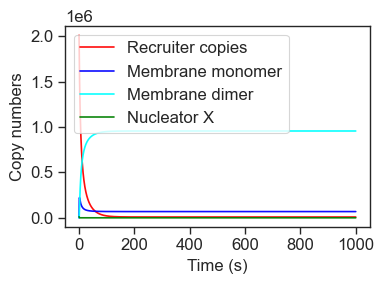

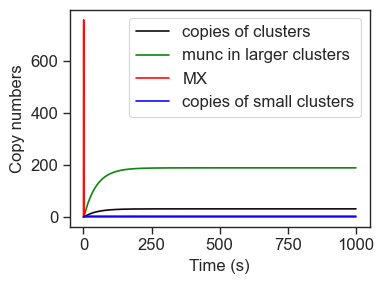

<Figure size 640x480 with 0 Axes>

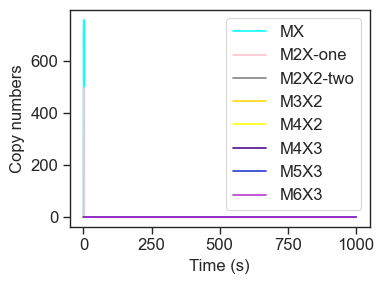

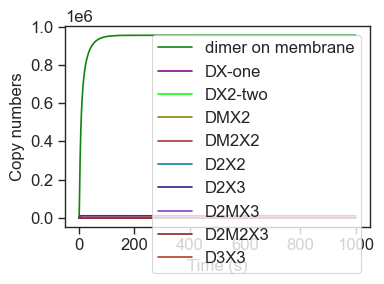

In [34]:


candidate = dataF.loc[whichRow][param_cols].values  # Gets all parameter columns for row 50
whichSol = model.simulate_pre(candidate)
print(candidate)
fit = model.fitness_function_to_call(candidate)
print("fitness of this candidate: ", fit)
model.test_mass_conservation(whichSol)
model.plot_freespecies_time(whichSol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(whichSol, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(whichSol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(whichSol, figsize=(4, 3), fontsize=12, dpi=300)
#model.plot_cluster_kinetic(sol, figsize=(4, 3), fontsize=12